In [1]:
import subprocess
import os
import time
import numpy as np
import pandas as pd
import openpyxl
import datetime
import hydroeval as he
from configparser import ConfigParser
import matplotlib.pyplot as plt

In [3]:
#Import paths
obs_path = r"P:\Projects\Olivares\Streamflow\qobs_v0.csv"
sim_path = r"C:\Users\pauls\Anaconda3\pkgs\sphy-2.2.1-py_0\site-packages\SPHY\Olivares\output\QTOTSubBasinTSS.tss"
    
#Read and prepare obs streamflow
obs = pd.read_csv(obs_path)
obs = obs.iloc[:,1]

#Read and prepare sim streamflow
sim_read = pd.read_csv(sim_path,index_col=False,skiprows=4)
sim = []
    
for v in range(len(sim_read)):
    val = sim_read.iloc[v,0].strip()
    val = " ".join(val.split())
    sim.append(val)

sim = pd.DataFrame(sim)
sim.columns = ["name"]
sim = sim["name"].str.split(" ",expand=True)
sim = pd.DataFrame(sim.iloc[:,2]).astype(float)
sim = sim.iloc[:,0]

#Calculate KGE'
kge = pd.DataFrame(he.evaluator(he.kgeprime, sim, obs),index=["KGE","r","γ","β"])
nash = pd.DataFrame(he.evaluator(he.nse, sim, obs),index=["NASH"])
#array.append(kge)
#array.append(nash)
print(kge)
print(nash)

            0
KGE  0.195260
r    0.637199
γ    1.690177
β    1.199091
             0
NASH -1.539601


In [10]:
kge[0][3]

0.7336228892958363

In [4]:
nash[0][0]

-1.539600659927416

In [25]:
kge2 = []
kge2.append(kge[0][0])

In [26]:
kge2.append(0.55)
kge2.append(0.1)
kge2.append(0.05)

In [27]:
kge2 = pd.DataFrame(kge2)
kge2

,0
0,0.230669
1,0.550000
2,0.100000
3,0.050000


<AxesSubplot:>

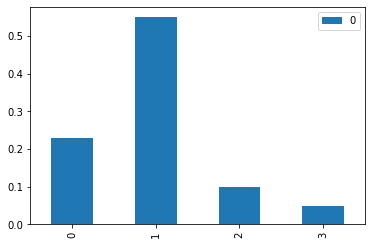

In [30]:
kge2.plot(kind="bar")

In [97]:
# Reading kge & nash
kge = pd.read_excel(r"P:\Projects\Olivares\Calibration\Sensitivity_analysis\kge.xlsx")
kge.columns = ["KGE"]
corr = pd.read_excel(r"P:\Projects\Olivares\Calibration\Sensitivity_analysis\correlation.xlsx")
corr.columns = ["Correlation"]
var = pd.read_excel(r"P:\Projects\Olivares\Calibration\Sensitivity_analysis\variability.xlsx")
var.columns = ["Coefficient of variation"]
bias = pd.read_excel(r"P:\Projects\Olivares\Calibration\Sensitivity_analysis\bias.xlsx")
bias.columns = ["Bias"]
nash = pd.read_excel(r"P:\Projects\Olivares\Calibration\Sensitivity_analysis\nash.xlsx")
nash.columns = ["Nash"]

In [75]:
kge

,KGE
0,0.195260
1,0.195260
2,0.195260
3,0.195260
4,0.195260
5,0.195260
6,0.195260
7,0.195260
8,0.195260
9,0.195260


In [98]:
index = [] 
param_names = ["RootDepthFlat","SubDepthFlat","CapRiseMax","GwDepth","GwSat","deltaGw","BaseThresh",
               "alphaGw","YieldGw","DDFG","DDFDG","GlacF","Tcrit","SnowSC","DDFS","kx"]
for i in param_names:
    if i == param_names[0]:
        index.append("base")
    index.append("0.5_"+i)
    index.append("1.5_"+i)
    
kge.index = index
corr.index = index
var.index = index
bias.index = index
nash.index = index

In [100]:
performance = [kge,corr,var,bias,nash]

kge2 = []
corr2 = []
var2 = []
bias2 = []
nash2 = []

performance2 = [kge2,corr2,var2,bias2,nash2]

for i in range(len(performance)):
    for v in range(len(performance[i])):
         performance2[i].append((performance[i].iloc[v,0] - performance[i].mean()[0])/performance[i].std()[0])

kge2 = pd.DataFrame(kge2)
corr2 = pd.DataFrame(corr2)
var2 = pd.DataFrame(var2)
bias2 = pd.DataFrame(bias2)
nash2 = pd.DataFrame(nash2)

kge2.index = index
corr2.index = index
var2.index = index
bias2.index = index
nash2.index = index

In [102]:
kge2

,0
base,0.044776
0.5_RootDepthFlat,0.044776
1.5_RootDepthFlat,0.044776
0.5_SubDepthFlat,0.044776
1.5_SubDepthFlat,0.044776
0.5_CapRiseMax,0.044776
1.5_CapRiseMax,0.044776
0.5_GwDepth,0.044776
1.5_GwDepth,0.044776
0.5_GwSat,0.044776


In [41]:
kge.mean()[0]
kge.std()[0]

0.06845154650374585

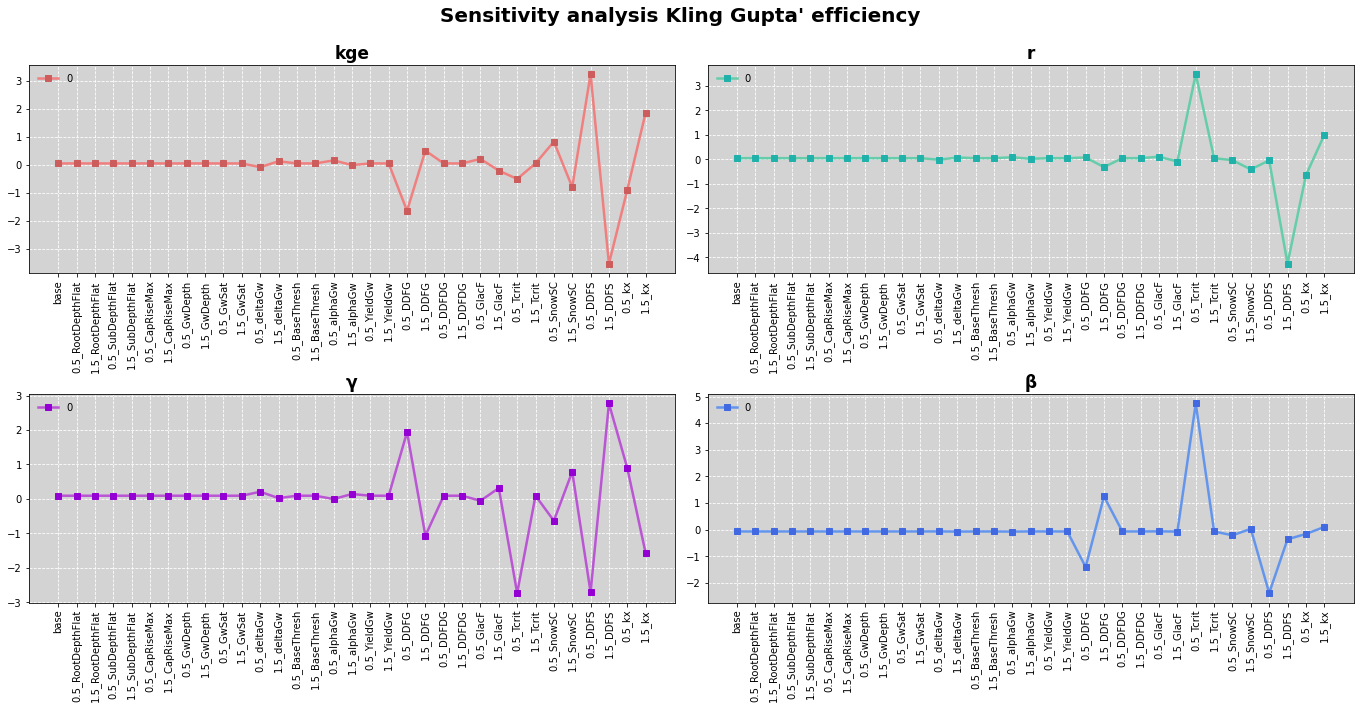

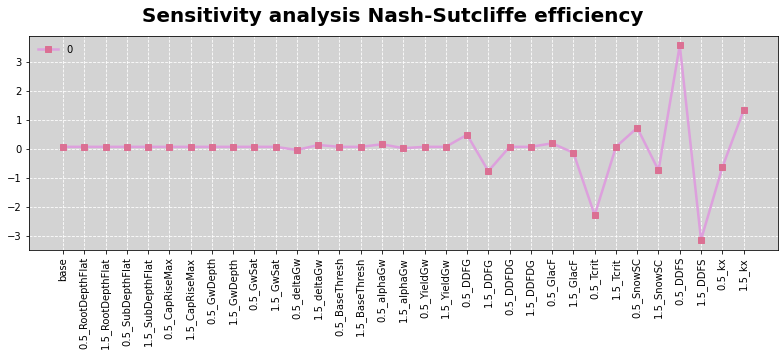

In [104]:
#KGE
#Define subplots dimensions
fig = plt.figure(figsize=(19,10))

#Specific settings
ax0 = fig.add_subplot(221)
kge2.plot(ax=ax0, color="lightcoral", linewidth=2.5, marker="s",markersize=6, markeredgecolor="indianred",markerfacecolor="indianred")
#ax0.scatter(index,kge.iloc[:,0])
ax0.set_facecolor("lightgray")
plt.grid(ls="--",color="white")
ax0.set_xticks(np.arange(len(kge)))
ax0.set_xticklabels(kge.index)
plt.xticks(rotation = 90)
plt.legend(loc="upper left",frameon=False)
plt.title("kge",fontweight="bold",fontsize=17)

ax1 = fig.add_subplot(222)
corr2.plot(ax=ax1, color="mediumaquamarine", linewidth=2.5, marker="s",markersize=6, markeredgecolor="lightseagreen",markerfacecolor="lightseagreen")
ax1.set_facecolor("lightgray")
plt.grid(ls="--",color="white")
ax1.set_xticks(np.arange(len(kge)))
ax1.set_xticklabels(kge.index)
plt.xticks(rotation = 90)
plt.legend(loc="upper left",frameon=False)
plt.title("r",fontweight="bold",fontsize=17)

ax2 = fig.add_subplot(223)
var2.plot(ax=ax2, color="mediumorchid", linewidth=2.5, marker="s",markersize=6, markeredgecolor="darkviolet",markerfacecolor="darkviolet")
ax2.set_facecolor("lightgray")
plt.grid(ls="--",color="white")
ax2.set_xticks(np.arange(len(kge)))
ax2.set_xticklabels(kge.index)
plt.xticks(rotation = 90)
plt.legend(loc="upper left",frameon=False)
plt.title("γ",fontweight="bold",fontsize=17)

ax3 = fig.add_subplot(224)
bias2.plot(ax=ax3, color="cornflowerblue",linewidth=2.5, marker="s",markersize=6, markeredgecolor="royalblue",markerfacecolor="royalblue")
ax3.set_facecolor("lightgray")
plt.grid(ls="--",color="white")
ax3.set_xticks(np.arange(len(kge)))
ax3.set_xticklabels(kge.index)
plt.xticks(rotation = 90)
plt.legend(loc="upper left",frameon=False)
plt.title("β",fontweight="bold",fontsize=17)
#General settings
plt.tight_layout()
fig.subplots_adjust(top=0.9)
fig.suptitle("Sensitivity analysis Kling Gupta' efficiency",fontweight="bold",fontsize=20)
fig.set_facecolor("white")
plt.show()


#fig.savefig(r"P:\Projects\Olivares\Calibration\Sensitivity_analysis\KGE.png",dpi=800)

#NASH - EDITTTT IN NEW ITERATION
#Define subplots dimensions
fig2 = plt.figure(figsize=(11,5))

#Specific settings
ax4 = fig2.add_subplot(111)
nash2.plot(ax=ax4, color="plum", linewidth=2.5, marker="s",markersize=6, markeredgecolor="palevioletred",markerfacecolor="palevioletred")
ax4.set_facecolor("lightgray")
plt.grid(ls="--",color="white")
ax4.set_xticks(np.arange(len(kge)))
ax4.set_xticklabels(kge.index)
plt.xticks(rotation = 90)
plt.legend(loc="upper left",frameon=False)

#General settings
plt.tight_layout()
fig2.subplots_adjust(top=0.9)
fig2.suptitle("Sensitivity analysis Nash-Sutcliffe efficiency",fontweight="bold",fontsize=20)
fig2.set_facecolor("white")
plt.show()


#fig2.savefig(r"P:\Projects\Olivares\Calibration\Sensitivity_analysis\NASH.png",dpi=800)

In [33]:
fig.savefig(r"P:\Projects\Olivares\Calibration\Sensitivity_analysis\KGE.png",dpi=800)

In [34]:
fig2.savefig(r"P:\Projects\Olivares\Calibration\Sensitivity_analysis\NASH.png",dpi=800)

In [6]:
index = [] 
param_names = ["RootDepthFlat","SubDepthFlat","CapRiseMax","GwDepth","GwSat","deltaGw","BaseThresh",
               "alphaGw","YieldGw","DDFG","DDFDG","GlacF","Tcrit","SnowSC","DDFS","kx"]
for i in param_names:
    if i == param_names[0]:
        index.append("base")
    index.append("0.5_"+i)
    index.append("1.5_"+i)
    
index

kge.index = index
corr.index = index
var.index = index
bias.index = index
nash.index = nash


#KGE
#Define subplots dimensions
fig = plt.figure(figsize=(19,10))

#Specific settings
ax0 = fig.add_subplot(221)
kge.plot(ax=ax0, color="lightcoral", linewidth=2.5, marker="s",markersize=6, markeredgecolor="indianred",markerfacecolor="indianred")
#ax0.scatter(index,kge.iloc[:,0])
ax0.set_facecolor("lightgray")
plt.grid(ls="--",color="white")
ax0.set_xticks(np.arange(len(kge)))
ax0.set_xticklabels(kge.index)
plt.xticks(rotation = 90)
plt.legend(loc="upper left",frameon=False)
plt.title("kge",fontweight="bold",fontsize=17)

ax1 = fig.add_subplot(222)
corr.plot(ax=ax1, color="mediumaquamarine", linewidth=2.5, marker="s",markersize=6, markeredgecolor="lightseagreen",markerfacecolor="lightseagreen")
ax1.set_facecolor("lightgray")
plt.grid(ls="--",color="white")
ax1.set_xticks(np.arange(len(kge)))
ax1.set_xticklabels(kge.index)
plt.xticks(rotation = 90)
plt.legend(loc="upper left",frameon=False)
plt.title("r",fontweight="bold",fontsize=17)

ax2 = fig.add_subplot(223)
var.plot(ax=ax2, color="mediumorchid", linewidth=2.5, marker="s",markersize=6, markeredgecolor="darkviolet",markerfacecolor="darkviolet")
ax2.set_facecolor("lightgray")
plt.grid(ls="--",color="white")
ax2.set_xticks(np.arange(len(kge)))
ax2.set_xticklabels(kge.index)
plt.xticks(rotation = 90)
plt.legend(loc="upper left",frameon=False)
plt.title("γ",fontweight="bold",fontsize=17)

ax3 = fig.add_subplot(224)
bias.plot(ax=ax3, color="cornflowerblue",linewidth=2.5, marker="s",markersize=6, markeredgecolor="royalblue",markerfacecolor="royalblue")
ax3.set_facecolor("lightgray")
plt.grid(ls="--",color="white")
ax3.set_xticks(np.arange(len(kge)))
ax3.set_xticklabels(kge.index)
plt.xticks(rotation = 90)
plt.legend(loc="upper left",frameon=False)
plt.title("β",fontweight="bold",fontsize=17)
#General settings
plt.tight_layout()
fig.subplots_adjust(top=0.9)
fig.suptitle("Sensitivity analysis Kling Gupta' efficiency",fontweight="bold",fontsize=20)
fig.set_facecolor("white")
plt.show()


#fig.savefig(r"P:\Projects\Olivares\Calibration\Sensitivity_analysis\KGE.png",dpi=800)

#NASH - EDITTTT IN NEW ITERATION
#Define subplots dimensions
fig2 = plt.figure(figsize=(11,5))

#Specific settings
ax4 = fig2.add_subplot(111)
nash.plot(ax=ax4, color="plum", linewidth=2.5, marker="s",markersize=6, markeredgecolor="palevioletred",markerfacecolor="palevioletred")
ax4.set_facecolor("lightgray")
plt.grid(ls="--",color="white")
ax4.set_xticks(np.arange(len(kge)))
ax4.set_xticklabels(kge.index)
plt.xticks(rotation = 90)
plt.legend(loc="upper left",frameon=False)

#General settings
plt.tight_layout()
fig2.subplots_adjust(top=0.9)
fig2.suptitle("Sensitivity analysis Nash-Sutcliffe efficiency",fontweight="bold",fontsize=20)
fig2.set_facecolor("white")
plt.show()


#fig2.savefig(r"P:\Projects\Olivares\Calibration\Sensitivity_analysis\NASH.png",dpi=800)

ValueError: Index data must be 1-dimensional